[[[0.00000000e+00 1.16382132e-02]
  [1.00020004e-03 2.33015403e-02]]

 [[1.00020004e-03 2.33015403e-02]
  [2.00040008e-03 3.49883227e-02]]

 [[2.00040008e-03 3.49883227e-02]
  [3.00060012e-03 4.66968803e-02]]

 ...

 [[4.99699940e+00 7.73018229e-01]
  [4.99799960e+00 7.53822423e-01]]

 [[4.99799960e+00 7.53822423e-01]
  [4.99899980e+00 7.33954830e-01]]

 [[4.99899980e+00 7.33954830e-01]
  [5.00000000e+00 7.13432449e-01]]]


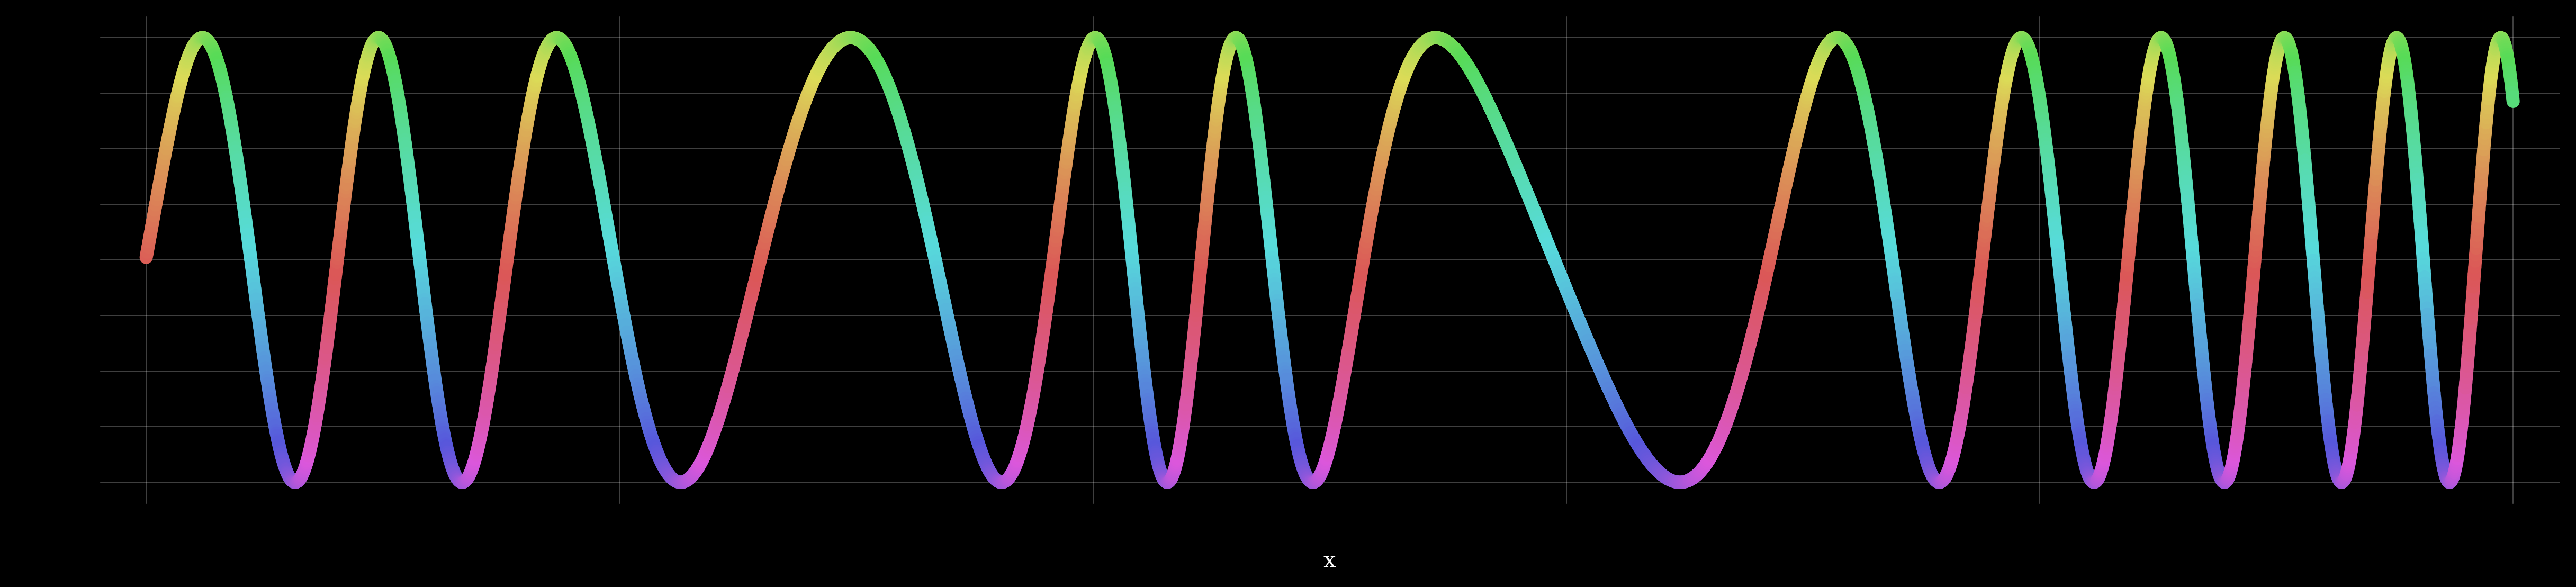

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.animation import FuncAnimation


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Latin Modern Roman'] + plt.rcParams['font.serif']
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

def get_wave_with_variable_frequency(time, freq_array):
    dt = np.full_like(time, time[1] - time[0])
    phases = (freq_array * 2*np.pi * dt).cumsum()
    return np.sin(phases), ((phases + np.pi) % (2 * np.pi) - np.pi)

N = 5000
t_start = 0
t_end = 5

time = np.linspace(t_start, t_end, N)

generator = np.random.default_rng(seed = 322)
x_samples = np.linspace(t_start, t_end, 10)
freq_samples = generator.random(x_samples.shape) * 6
interpolation = interp1d(x_samples, freq_samples, kind='quadratic')

freq = interpolation(time)
wave, phase = get_wave_with_variable_frequency(time, freq)

def setup_time_axes():
    fig, ax = plt.subplots(1, 1, figsize=(20,4), dpi=300)
    fig.set_facecolor('black')
    ax.set_facecolor('black')
    ax.set_xlim(t_start-0.1, t_end+0.1)
    ax.set_ylim(-1.1, 1.1)
    ax.grid(color='white', linewidth = 0.4, alpha=0.3, zorder=0)
    ax.set_xlabel('x')
    return fig, ax

phase_map = sns.color_palette('hls', as_cmap=True)

def angle2color(angle):
    return phase_map((angle % (2*np.pi)) / (2 * np.pi))

fig, ax = setup_time_axes()

points = np.array([time, wave]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
print(segments)
lc = mpl.collections.LineCollection(segments, linewidths=6)
lc.set_colors(angle2color(phase[:-1]))
lc.set_capstyle("round")
ax.add_collection(lc)

plt.show()